In [52]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import pylab as py
from ipywidgets import interact
from sklearn.datasets import make_blobs
from fig_code import visualize_tree, plot_tree_interactive
%matplotlib inline

In [ ]:
#read in the team data
df = pd.read_csv('team_stats.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

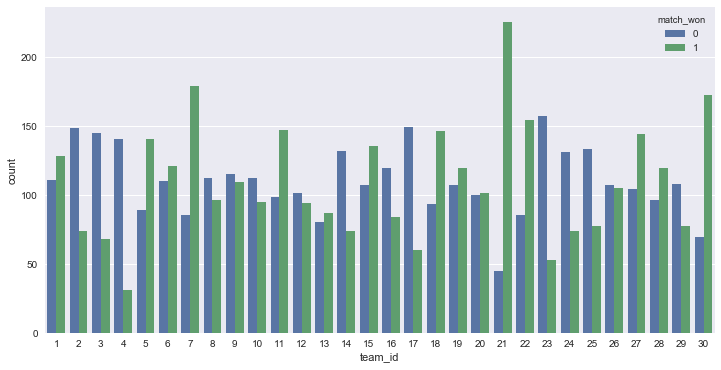

In [86]:
#initial visualization
#plots games won versus lost for each team
plt.figure(figsize=(12,6))
sns.countplot(df['team_id'],hue=df['match_won'])

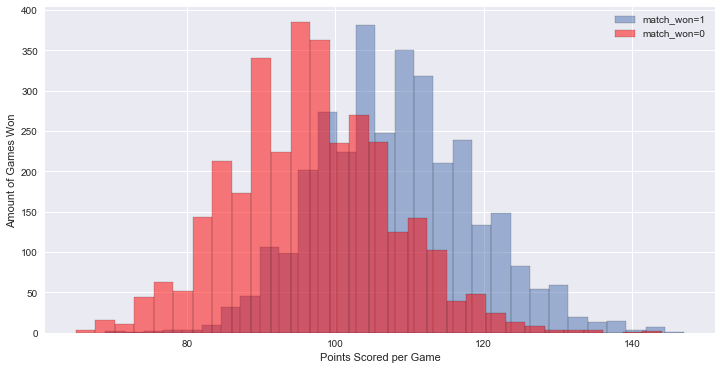

In [87]:
#plot showing the relationship between games won and team points per game
#generally, the more points a team scores, the more likely they are to win
plt.figure(figsize=(12,6))
plt.hist(df[df['match_won']==1]['PTS'],bins=30,alpha=0.5,edgecolor='black')
plt.hist(df[df['match_won']==0]['PTS'],color='red',bins=30,alpha=0.5,edgecolor='black')
plt.legend(['match_won=1','match_won=0'])
plt.xlabel("Points Scored per Game")
plt.ylabel("Amount of Games Won")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 55 columns):
id            6576 non-null int64
match_won     6576 non-null int64
at_home       6576 non-null int64
match_id      6576 non-null int64
team_id       6576 non-null int64
MP            0 non-null float64
OPOS          0 non-null float64
DPOS          0 non-null float64
FG            6576 non-null int64
FGA           6576 non-null int64
FGP           6576 non-null float64
PTS           6576 non-null int64
TWO           6576 non-null int64
TWOA          6576 non-null int64
TWOP          6576 non-null float64
TWOAr         6576 non-null float64
THR           6576 non-null int64
THRA          6576 non-null int64
THRP          6576 non-null float64
THRAr         6576 non-null float64
FT            6576 non-null int64
FTA           6576 non-null int64
FTP           6576 non-null float64
FTAr          6576 non-null float64
FT_to_FGA     6576 non-null float64
EFGP          6576 non-null fl

In [113]:
#categorical feature analysis of match_won column
#transform to dummy variables
cat_feats = ['match_won']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.head()

,id,at_home,match_id,team_id,MP,OPOS,DPOS,FG,FGA,FGP,...,STLP,BLKP,TOVP,USGP,ORtg,AORtg,DRtg,ADRtg,PLUS_MINUS,match_won_1
0,1,1,1,29,NaN,NaN,NaN,41,101,0.405941,...,10.5,23.3,7.3,100,106.1,NaN,88.2,NaN,17,1
1,2,0,1,14,NaN,NaN,NaN,32,84,0.380952,...,5.3,10.7,16.2,100,88.2,NaN,106.1,NaN,-17,0
2,3,1,2,1,NaN,NaN,NaN,49,88,0.556818,...,11.1,8.2,10.9,100,121.8,NaN,105.7,NaN,16,1
3,4,0,2,2,NaN,NaN,NaN,39,80,0.487500,...,6.0,10.6,17.9,100,105.7,NaN,121.8,NaN,-16,0
4,5,1,3,12,NaN,NaN,NaN,41,101,0.405941,...,7.9,13.6,8.1,100,106.8,NaN,104.8,NaN,2,1


In [152]:
#train-test splitting
X,y = make_blobs(n_samples=1000, centers = 4,
                random_state=0, cluster_std=2.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [153]:
#decision tree training, predicitons, inferences
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)
predictions = dTree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.49      0.42      0.45        85
          1       0.69      0.77      0.73        75
          2       0.51      0.47      0.49        77
          3       0.61      0.70      0.65        63

avg / total       0.57      0.58      0.57       300



In [154]:
#random forests: traing, predicitons, inferences
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.56      0.49      0.53        85
          1       0.72      0.76      0.74        75
          2       0.61      0.61      0.61        77
          3       0.70      0.76      0.73        63

avg / total       0.64      0.65      0.64       300



In [155]:
#random forest inferences (ctd.)
#confusion matrix from random forests

print(confusion_matrix(y_test, rfc_pred))

[[42 14 15 14]
 [ 8 57 10  0]
 [15  8 47  7]
 [10  0  5 48]]


<function __main__.fit_tree>

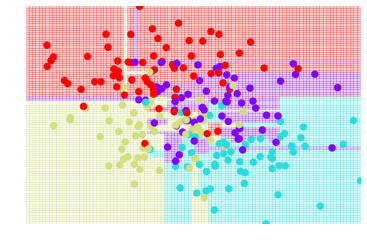

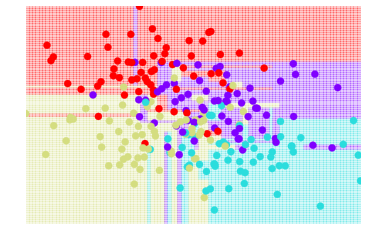

In [112]:
#visualization of decision tree classification
#code from https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-random-forest.ipynb
def fit_tree(random_state = 0):
    X, y = make_blobs(n_samples=300, centers=2,
                     random_state=0, cluster_std=2.0)
    clf = DecisionTreeClassifier(max_depth=15)
    rng = np.random.RandomState(random_state)
    i = np.arange(len(y))
    rng.shuffle(i)
    visualize_tree(clf, X[i[:250]], y[i[:250]], boundaries=False,
                  xlim=(X[:, 0].min(), X[:, 0].max()),
                  ylim=(X[:, 1].min(), X[:, 1].max()))

interact(fit_tree, random_state=[0, 100])

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0, 2, 2,
       3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2, 3, 1, 3,
       2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0, 3, 3, 0, 1,
       3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0, 2, 2, 1, 3, 1,
       0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3,
       0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 0, 3, 2,
       3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0, 3, 1, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 0, 1, 1, 1, 3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3,
       2])

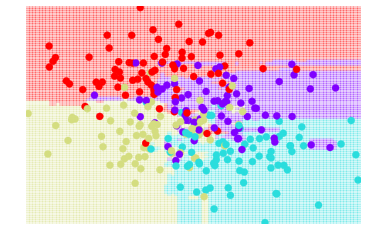

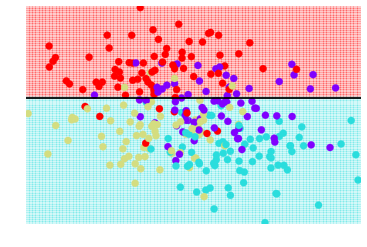

In [111]:
#continuation of visualization of random forests
#shows how the decision trees are splitting at depths of 1 and 5
#code from https://github.com/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-random-forest.ipynb
X, y = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=2.0)
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
visualize_tree(clf, X, y, boundaries=False)
plot_tree_interactive(X,y);
clf.predict(X)